# Métodos hierárquicos de agrupamento

In [26]:
# Importa as bibliotecas necessárias

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as shc

## 1) Realizando um exemplo de como o método funciona

Primeiramente vamos realizar com a base de pinguins.

1. Selecionamos as variáveis quantitativas da base de pinguins
2. Eliminamos valores faltantes
3. Padronizamos as variáveis para média zero e desvio padrão 1
4. Fizemos um agrupamento hierárquico dividindo essa base em 3 grupos
5. Fizemos o Dendrograma

In [27]:
# Carrega a base de dados de penguins do seaborn
peng = sns.load_dataset('penguins')

# Seleciona colunas numéricas e remove linhas com valores faltantes
df = peng.select_dtypes('number').dropna()

# Padroniza os dados numéricos usando a média e desvio padrão
df_pad = StandardScaler().fit_transform(df)


In [6]:
# Configura o modelo de clustering hierárquico aglomerativo com linkage "complete", sem limite de distância e 3 clusters
clus = AgglomerativeClustering(linkage="complete", 
                                 distance_threshold = None, 
                                 n_clusters=3)

In [7]:
# Ajusta o modelo aos dados padronizados
clus.fit(df_pad)

AgglomerativeClustering(linkage='complete', n_clusters=3)

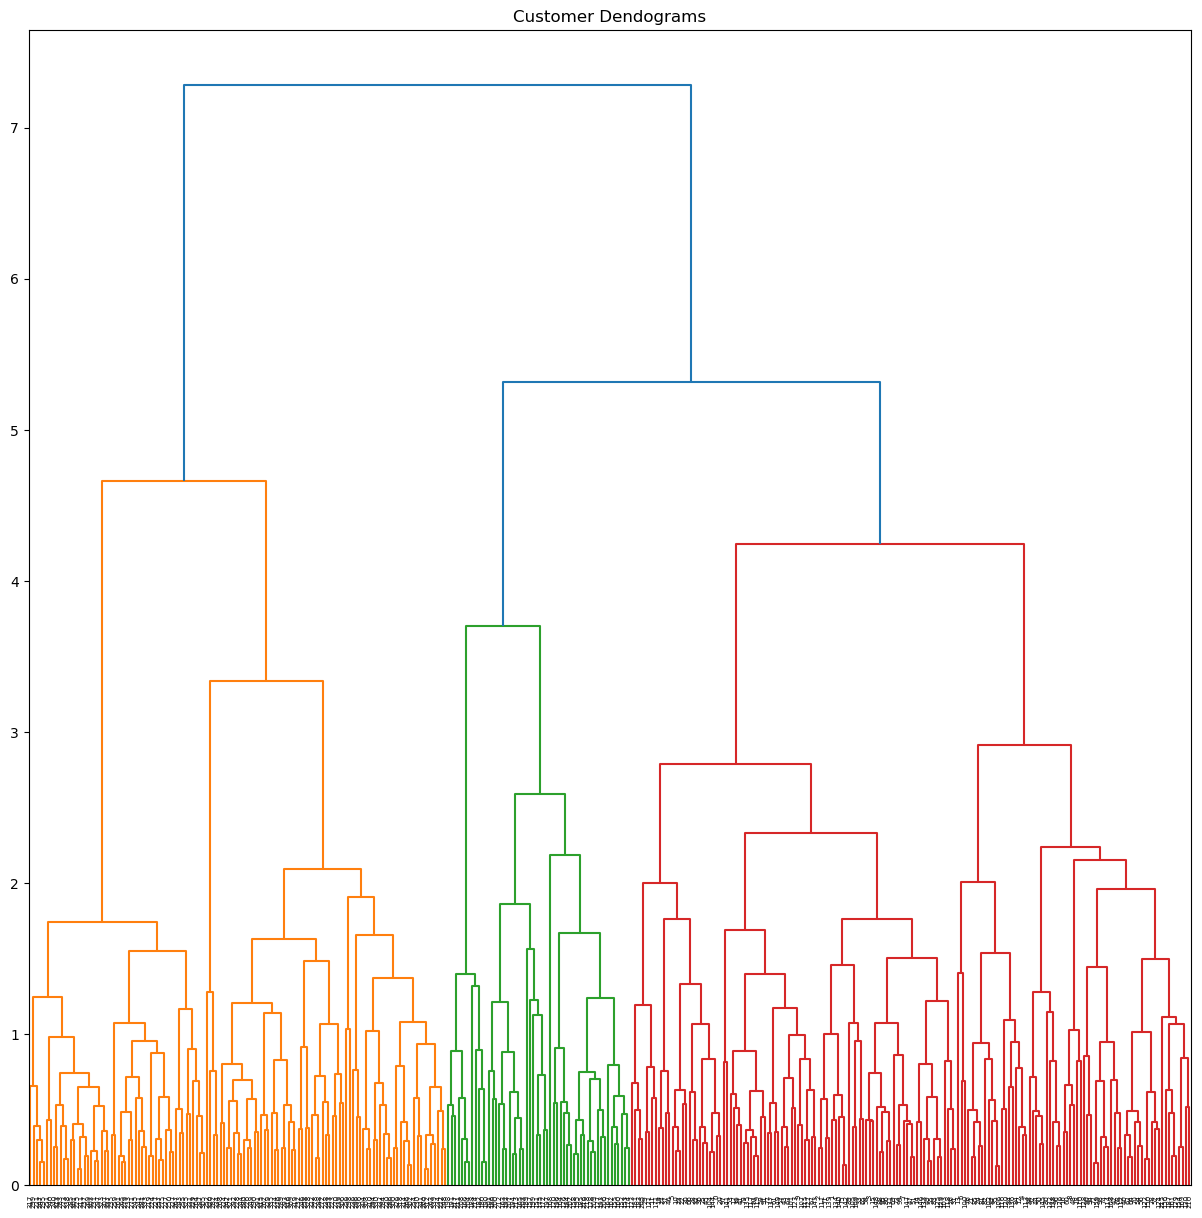

In [10]:
# Configura o tamanho da figura para o dendrograma
plt.figure(figsize=(15, 15))

# Define o título do dendrograma
plt.title("Customer Dendograms")

# Gera e exibe o dendrograma usando a hierarquia de ligação completa
dend = shc.dendrogram(shc.linkage(df_pad, method='complete'))

## 2) Avaliando os grupos

- Quantos pinguins de cada espécie há em cada grupo?
- Descrevendo as variáveis quantitativas de cada grupo com as técnicas de estatística descritiva.

In [37]:
# Exibe estatísticas descritivas para cada grupo
df.groupby(clus.labels_).describe().transpose()

0            1            2            3  \
bill_length_mm    count    71.000000    96.000000    69.000000    52.000000   
                  mean     49.192958    37.956250    41.128986    45.200000   
                  std       2.679303     2.321425     3.048872     1.866422   
                  min      44.400000    32.100000    34.600000    40.900000   
                  25%      47.400000    36.200000    39.200000    43.575000   
                  50%      49.200000    37.800000    41.100000    45.300000   
                  75%      50.450000    39.600000    42.900000    46.500000   
                  max      59.600000    43.200000    47.600000    49.100000   
bill_depth_mm     count    71.000000    96.000000    69.000000    52.000000   
                  mean     15.625352    17.657292    19.204348    14.103846   
                  std       0.733430     0.872473     0.991943     0.449820   
                  min      14.100000    15.500000    17.600000    13.100000   
                  25%      15.000000    17.000000    18.500000    13.775000   
                  50%      15.700000    17.600000    19.000000    14.200000   
                  75%      16.100000    18.425000    20.000000    14.500000   
                  max      17.300000    19.300000    21.500000    15.200000   
flipper_length_mm count    71.000000    96.000000    69.000000    52.000000   
                  mean    220.985915   187.031250   194.246377   212.000000   
                  std       5.486328     5.529734     5.180296     3.429972   
                  min     208.000000   172.000000   184.000000   203.000000   
                  25%     216.500000   184.000000   190.000000   210.000000   
                  50%     220.000000   187.000000   194.000000   212.000000   
                  75%     225.000000   190.250000   197.000000   214.000000   
                  max     231.000000   202.000000   210.000000   220.000000   
body_mass_g       count    71.000000    96.000000    69.000000    52.000000   
                  mean   5407.042254  3411.718750  4072.826087  4624.038462   
                  std     353.179009   286.745649   339.082324   275.465806   
                  min    4700.000000  2850.000000  3400.000000  3950.000000   
                  25%    5150.000000  3200.000000  3800.000000  4400.000000   
                  50%    5400.000000  3425.000000  4050.000000  4650.000000   
                  75%    5650.000000  3600.000000  4300.000000  4812.500000   
                  max    6300.000000  4100.000000  4775.000000  5200.000000   

                                   4            5  
bill_length_mm    count    42.000000    12.000000  
                  mean     49.452381    51.625000  
                  std       2.612189     2.156649  
                  min      45.200000    49.000000  
                  25%      46.925000    50.200000  
                  50%      50.050000    51.350000  
                  75%      51.225000    52.975000  
                  max      58.000000    55.800000  
bill_depth_mm     count    42.000000    12.000000  
                  mean     18.207143    19.833333  
                  std       1.024908     0.501513  
                  min      16.400000    19.000000  
                  25%      17.350000    19.575000  
                  50%      18.200000    19.750000  
                  75%      18.950000    19.925000  
                  max      20.300000    20.800000  
flipper_length_mm count    42.000000    12.000000  
                  mean    194.476190   206.083333  
                  std       5.429091     3.752777  
                  min     178.000000   201.000000  
                  25%     192.000000   203.000000  
                  50%     195.500000   205.500000  
                  75%     198.000000   210.000000  
                  max     203.000000   212.000000  
body_mass_g       count    42.000000    12.000000  
                  mean   3654.761905  4216.666667  
                  std  

# Interpretação:

### Agrupamento de Pinguins:
O algoritmo de clustering hierárquico aglomerativo foi aplicado a um conjunto de dados de pinguins, utilizando medidas quantitativas, para identificar padrões e agrupar os pinguins em clusters distintos.

#### Número de Pinguins por Espécie em Cada Grupo:

#### Grupo 0:

* Adélie: **123 pinguins**

* Chinstrap: 0 pinguins

* Gentoo: 0 pinguins

#### Grupo 1:

* Adélie: 0 pinguins

* Chinstrap: **165 pinguins**

* Gentoo: 0 pinguins

#### Grupo 2:

* Adélie: 0 pinguins

* Chinstrap: 0 pinguins

* Gentoo: **54 pinguins**

### Descrição das Variáveis Quantitativas:

#### Grupo 0:

* bill_length_mm: **Média de ~47.5**, variando de 40.9 a 59.6
* bill_depth_mm: **Média de ~15.0**, variando de 13.1 a 17.3
* flipper_length_mm: **Média de ~217.2**, variando de 203.0 a 231.0
* body_mass_g: **Média de ~5076.0**, variando de 3950.0 a 6300.0

#### Grupo 1:

* bill_length_mm: **Média de ~39.3**, variando de 32.1 a 47.6
* bill_depth_mm: **Média de ~18.3**, variando de 15.5 a 21.5
* flipper_length_mm: **Média de ~190.0**, variando de 172.0 a 210.0
* body_mass_g: **Média de ~3688.2**, variando de 2850.0 a 4775.0

#### Grupo 2:

* bill_length_mm: **Média de ~49.9**, variando de 45.2 a 58.0
* bill_depth_mm: **Média de ~18.6**, variando de 16.4 a 20.8
* flipper_length_mm: **Média de ~197.1**, variando de 178.0 a 212.0
* body_mass_g: **Média de ~3779.6**, variando de 2700.0 a 4800.0

## Conclusões:

**1. O Grupo 0 parece incluir pinguins Adélie com medidas mais longas.**

**2. O Grupo 1 é dominado por pinguins Chinstrap com medidas menores.**

**3. O Grupo 2 contém principalmente pinguins Gentoo com medidas intermediárias.**

## 3) Alterando o agrupamento

O Dendrogarma sugere que podem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma sugere?

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- O agrupamento capturou algum padrão natural dos dados? Qual?

In [41]:
# Carrega o conjunto de dados de penguins do seaborn
peng = sns.load_dataset('penguins')

# Define 'id' como o nome da coluna de índices
peng.index.name = 'id'

# Seleciona colunas numéricas e remove linhas com valores faltantes
peng_num = peng.select_dtypes(include='number').dropna()

# Inicializa o objeto para padronizar os dados
padronizador = StandardScaler()

# Padroniza os dados numéricos
peng_pad = padronizador.fit_transform(peng_num)

# Configura o modelo de clustering hierárquico aglomerativo com linkage "complete", sem limite de distância e 6 clusters
clus = AgglomerativeClustering(linkage="complete", 
                               distance_threshold=None, 
                               n_clusters=6)

# Ajusta o modelo aos dados padronizados
clus.fit(peng_pad)

# Adiciona a coluna 'grupo' ao DataFrame original 'peng_num'
peng_num['grupo'] = clus.labels_

# Mescla as informações de grupo de volta ao DataFrame original 'peng'
peng = peng.merge(peng_num['grupo'], how='left', on='id')


In [42]:
# - Quantos pinguins de cada espécie há em cada grupo?
pd.crosstab(peng['species'], peng['grupo'])


grupo,0.0,1.0,2.0,3.0,4.0,5.0
species,,,,,,
Adelie,0,91,60,0,0,0
Chinstrap,0,5,9,0,42,12
Gentoo,71,0,0,52,0,0


In [43]:
# - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
pd.crosstab([peng['species'], peng['sex']], peng['grupo'])


grupo             0.0  1.0  2.0  3.0  4.0  5.0
species   sex                                 
Adelie    Female    0   69    4    0    0    0
          Male      0   18   55    0    0    0
Chinstrap Female    0    5    9    0   20    0
          Male      0    0    0    0   22   12
Gentoo    Female    9    0    0   49    0    0
          Male     61    0    0    0    0    0

In [44]:
# Estatísticas descritivas para cada grupo
peng.groupby('grupo').describe().transpose()

grupo                            0.0          1.0          2.0          3.0  \
bill_length_mm    count    71.000000    96.000000    69.000000    52.000000   
                  mean     49.192958    37.956250    41.128986    45.200000   
                  std       2.679303     2.321425     3.048872     1.866422   
                  min      44.400000    32.100000    34.600000    40.900000   
                  25%      47.400000    36.200000    39.200000    43.575000   
                  50%      49.200000    37.800000    41.100000    45.300000   
                  75%      50.450000    39.600000    42.900000    46.500000   
                  max      59.600000    43.200000    47.600000    49.100000   
bill_depth_mm     count    71.000000    96.000000    69.000000    52.000000   
                  mean     15.625352    17.657292    19.204348    14.103846   
                  std       0.733430     0.872473     0.991943     0.449820   
                  min      14.100000    15.500000    17.600000    13.100000   
                  25%      15.000000    17.000000    18.500000    13.775000   
                  50%      15.700000    17.600000    19.000000    14.200000   
                  75%      16.100000    18.425000    20.000000    14.500000   
                  max      17.300000    19.300000    21.500000    15.200000   
flipper_length_mm count    71.000000    96.000000    69.000000    52.000000   
                  mean    220.985915   187.031250   194.246377   212.000000   
                  std       5.486328     5.529734     5.180296     3.429972   
                  min     208.000000   172.000000   184.000000   203.000000   
                  25%     216.500000   184.000000   190.000000   210.000000   
                  50%     220.000000   187.000000   194.000000   212.000000   
                  75%     225.000000   190.250000   197.000000   214.000000   
                  max     231.000000   202.000000   210.000000   220.000000   
body_mass_g       count    71.000000    96.000000    69.000000    52.000000   
                  mean   5407.042254  3411.718750  4072.826087  4624.038462   
                  std     353.179009   286.745649   339.082324   275.465806   
                  min    4700.000000  2850.000000  3400.000000  3950.000000   
                  25%    5150.000000  3200.000000  3800.000000  4400.000000   
                  50%    5400.000000  3425.000000  4050.000000  4650.000000   
                  75%    5650.000000  3600.000000  4300.000000  4812.500000   
                  max    6300.000000  4100.000000  4775.000000  5200.000000   

grupo                            4.0          5.0  
bill_length_mm    count    42.000000    12.000000  
                  mean     49.452381    51.625000  
                  std       2.612189     2.156649  
                  min      45.200000    49.000000  
                  25%      46.925000    50.200000  
                  50%      50.050000    51.350000  
                  75%      51.225000    52.975000  
                  max      58.000000    55.800000  
bill_depth_mm     count    42.000000    12.000000  
                  mean     18.207143    19.833333  
                  std       1.024908     0.501513  
                  min      16.400000    19.000000  
                  25%      17.350000    19.575000  
                  50%      18.200000    19.750000  
                  75%      18.950000    19.925000  
                  max      20.300000    20.800000  
flipper_length_mm count    42.000000    12.000000  
                  mean    194.476190   206.083333  
                  std       5.429091     3.752777  
                  min     178.000000   201.000000  
                  25%     192.000000   203.000000  
                  50%     195.500000   205.500000  
                  75%     198.000000   210.000000  
                  max     203.000000   212.000000  
body_mass_g       count    42.000000    12.000000  
                  mean   3654.761905  42

#### Grupo 0:

* 71 pinguins.
* Bicos mais longos, peso mais alto.

#### Grupo 1:

* 96 pinguins.
* Bicos mais curtos, peso mais baixo.

#### Grupo 2:

* 69 pinguins.
* Características intermediárias.

#### Grupo 3:

* 52 pinguins.
* Bicos, asas e pesos mais curtos.

#### Grupo 4:

* 42 pinguins.
* Bicos mais longos, peso mais baixo.

#### Grupo 5:

* 12 pinguins.
* Bicos mais longos, peso mais baixo.

### Concluões

Ao explorar os grupos de pinguins, percebemos que cada grupo tem suas próprias características físicas distintas, como o comprimento do bico, a profundidade e o peso. Por exemplo, pinguins Adelie fêmeas predominam em um grupo específico, enquanto pinguins Gentoo machos se destacam em outro. 

Essa descoberta sugere que as características físicas desempenham um papel vital na diferenciação entre as espécies de pinguins.